**Importing the Necessary Libraries**.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV

**Data Preprocessing**
1. Load the data into a suitable data structure
2. Handle any missing values, '?' values are missing data, Replace with 'NaN' values


In [ ]:
cancer_data = pd.read_csv("/content/kag_risk_factors_cervical_cancer.csv")

In [ ]:
print(cancer_data.shape)

(858, 36)


In [ ]:
print(cancer_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [ ]:
cancer_data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [ ]:
cancer_data.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# "?" Replace with NaN
cancer_data.replace("?", np.NaN, inplace=True)

In [ ]:
missing_values_count = cancer_data.isnull().sum()
missing_values_percentage = (missing_values_count / len(cancer_data)) * 100
missing_values_summary = pd.DataFrame({'Number of Missing Values': missing_values_count, 'Percentage of Missing Values': missing_values_percentage})
print("Summary of Missing Values:")
print(missing_values_summary)

Summary of Missing Values:
                                    Number of Missing Values  \
Age                                                        0   
Number of sexual partners                                 26   
First sexual intercourse                                   7   
Num of pregnancies                                        56   
Smokes                                                    13   
Smokes (years)                                            13   
Smokes (packs/year)                                       13   
Hormonal Contraceptives                                  108   
Hormonal Contraceptives (years)                          108   
IUD                                                      117   
IUD (years)                                              117   
STDs                                                     105   
STDs (number)                                            105   
STDs:condylomatosis                                      105   
STDs:cervical

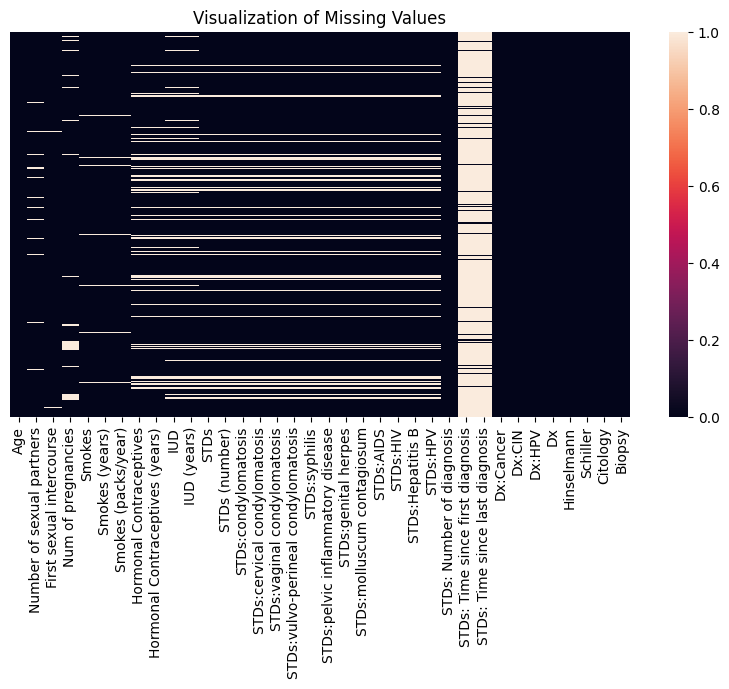

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(cancer_data.isnull(),yticklabels= False)
plt.title("Visualization of Missing Values")
plt.show()

In [ ]:
#drop STDs: Time since first diagnosis and STDs: Time since last diagnosis variables because there are too many missing values.
cancer_data= cancer_data.drop(columns=['STDs: Time since first diagnosis','STDs: Time since last diagnosis'])

In [ ]:
numerical_columns = cancer_data.select_dtypes(include=np.number).columns
categorical_columns = cancer_data.select_dtypes(include='object').columns

# Filling missing values in numeric variables with median
for column in numerical_columns:
    median_value = cancer_data[column].median()
    cancer_data.loc[:, column] = cancer_data[column].fillna(median_value)

# Filling missing values in categorical variables with mode
for column in categorical_columns:
    mode_value = cancer_data[column].mode()[0]
    cancer_data.loc[:, column] = cancer_data[column].fillna(mode_value)

# Finally, convert all data to numeric values
cancer_data = cancer_data.apply(pd.to_numeric)

In [ ]:
#checking for missing values
missing_values_count = cancer_data.isnull().sum()
print("Missing Values:", missing_values_count)

Missing Values: Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                

**Exploratory Data Analysis — EDA**
1. Explore the distribution of each feature.
2. Analyze correlations between features and the target variable (cervical cancer diagnosis).
3. Visualize relationships between variables to understand the data better

In [ ]:
cancer_data.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.511655,16.979021,2.192308,0.143357,1.201241,0.446278,0.686480,1.972394,0.096737,...,0.002331,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.644759,2.797653,1.434395,0.350641,4.060623,2.210351,0.464194,3.597888,0.295771,...,0.048252,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.250000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The standard deviation of the age parameter gave a high value, Outliers are possible.

In [ ]:
cancer_data= cancer_data.drop(columns=['STDs:cervical condylomatosis','STDs:AIDS'])

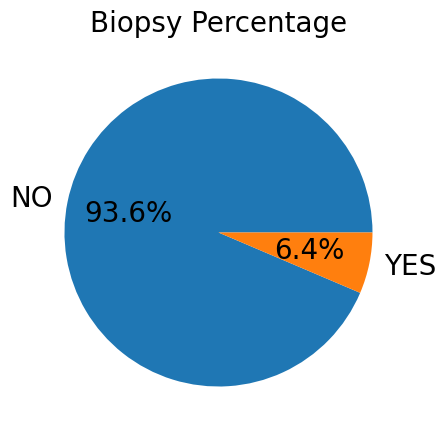

In [ ]:
impute = cancer_data.copy()
impute=cancer_data.astype('float')

plt.figure(figsize = (5,5))
plt.pie(impute['Biopsy'].value_counts(), labels = ['NO', 'YES'], autopct = '%1.1f%%', labeldistance=1.1, textprops = {'fontsize': 20})
plt.title('Biopsy Percentage', fontsize=20)
plt.show()

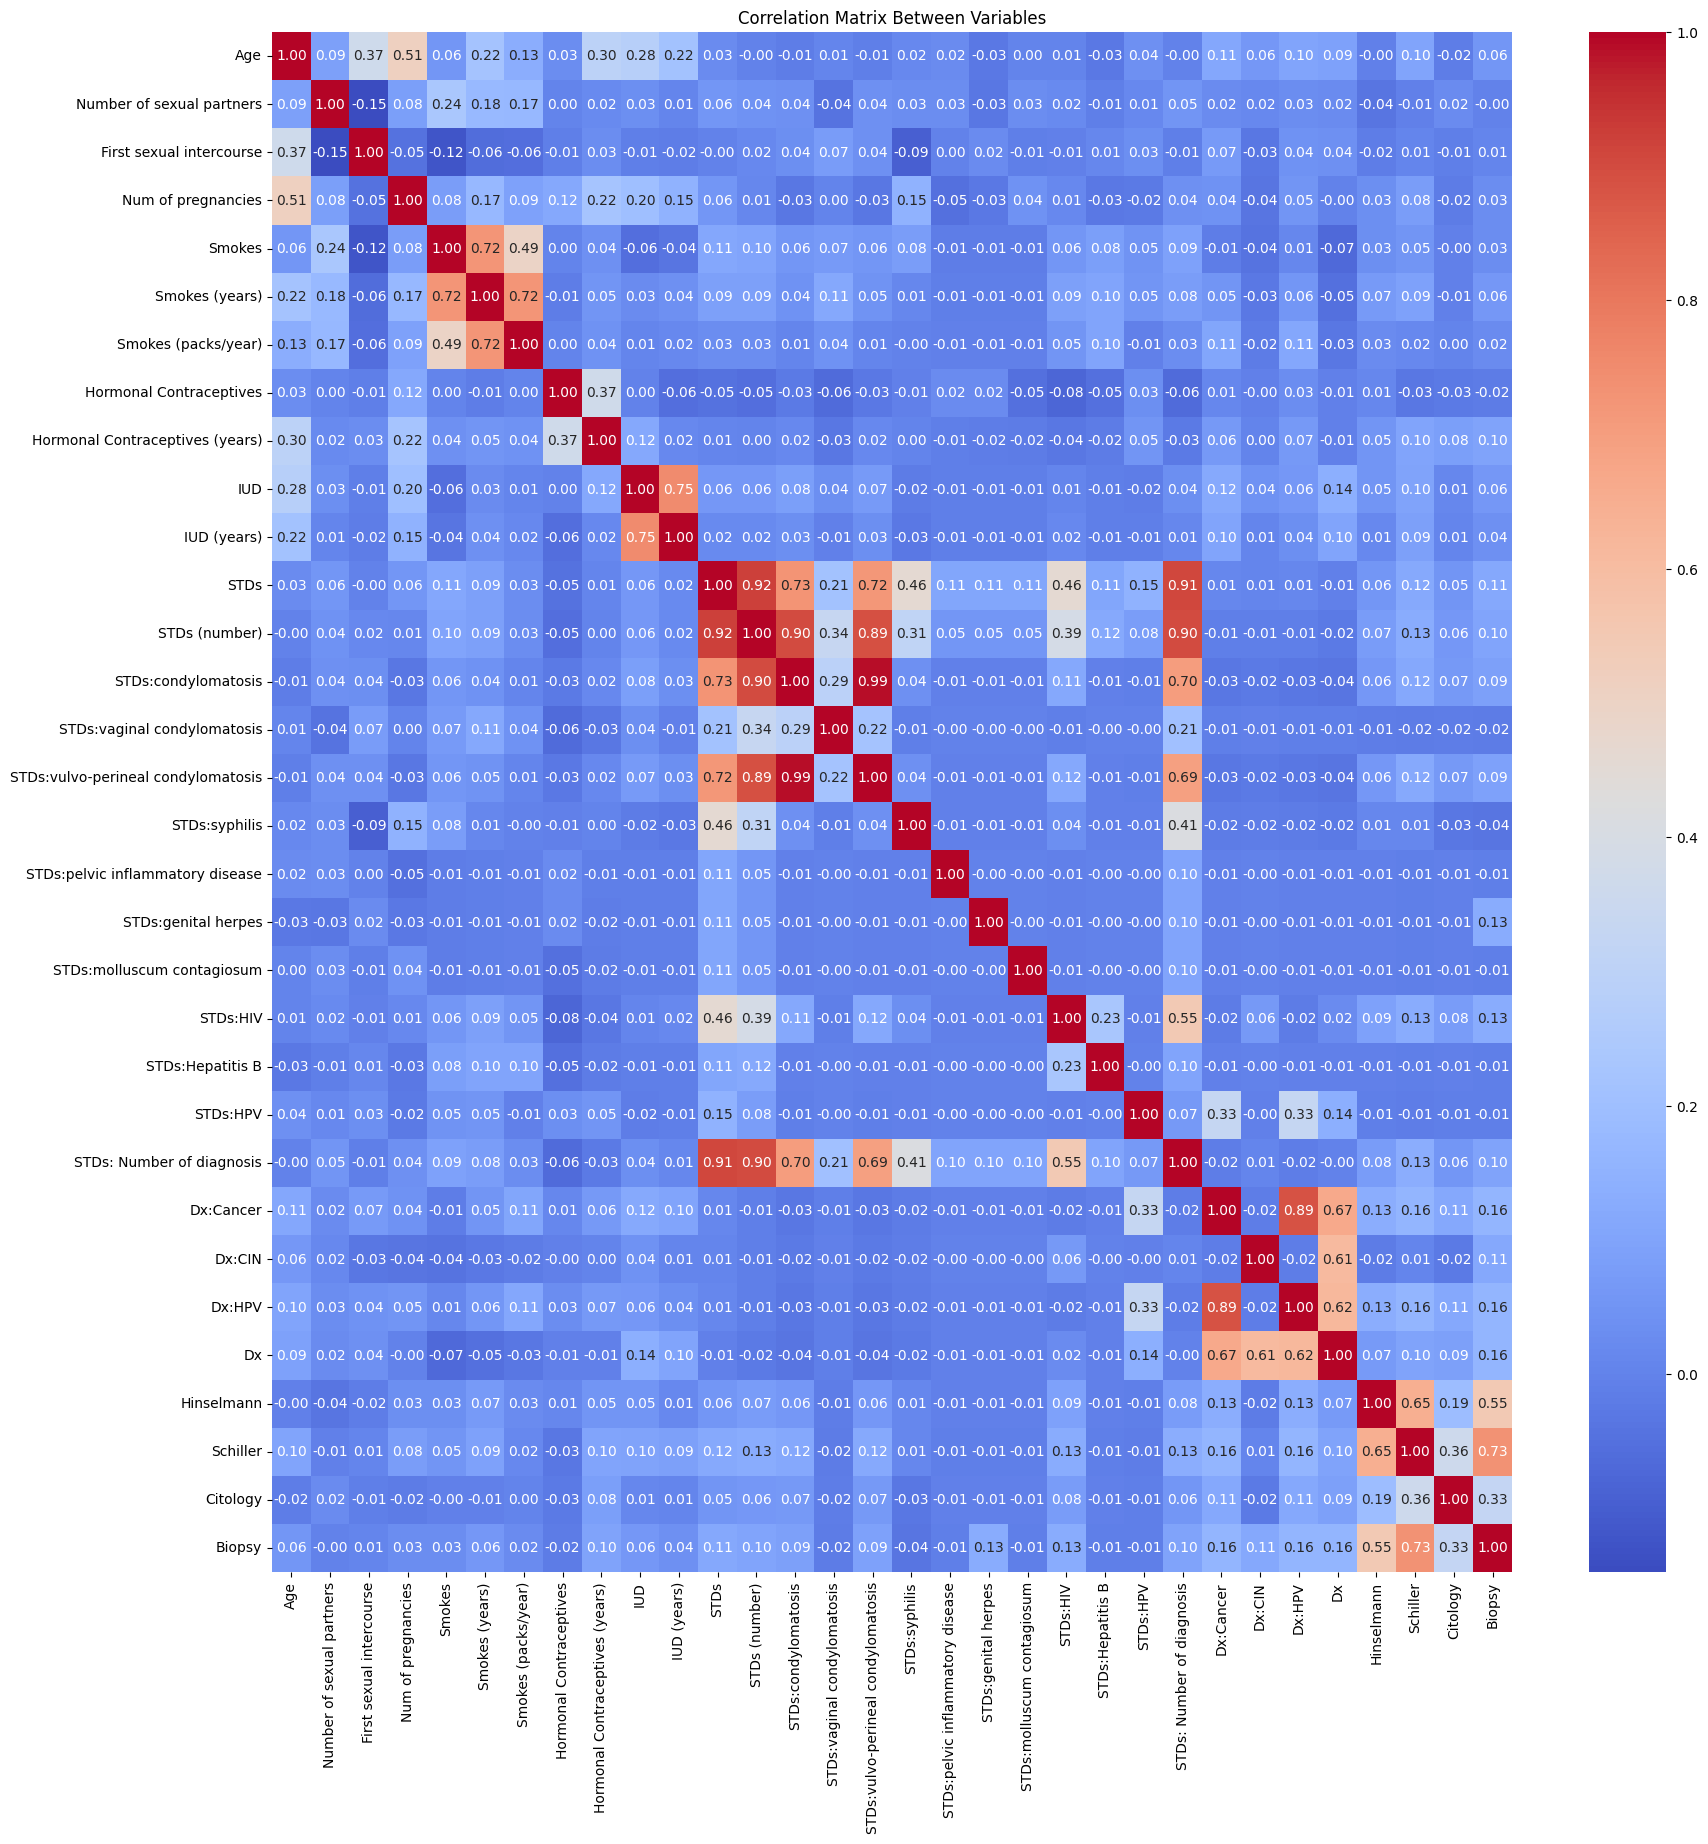

In [ ]:
# When examining relationships between variables, I will use the correlation matrix
# Creating a correlation table to be used to fill in missing values
correlation_matrix = cancer_data.corr()

# I visualize the correlation matrix so I can analyze it in more detail
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# with annot=true parameter, numerical values ​​are added to the cells of the matrix.
# cmap parameter determines the color gradation of the correlation coefficients
plt.title("Correlation Matrix Between Variables")
plt.show()

This matrix shows the correlation or influence between all features in the dataset. Values ​​closest to 1 (red) indicate almost perfect correlation, values ​​closest to 0 (blue) indicate almost no correlation, and negative values ​​(darkest) indicate inverse correlation.

As you can see, there is a diagonal strip of values ​​that are colored red and appear to be perfectly correlated, because the same features are aligned on the x and y axes, and the same features are perfectly correlated with each other.

Age and number of pregnancies are related, with older women having more pregnancies on average.

There is also a high correlation between cigarettes, cigarettes (year) and cigarettes (packs/year), as long-term smokers also smoke more packs per year.

The STD column is highly associated with STDs: condylomatosis suggests that this is a common STD

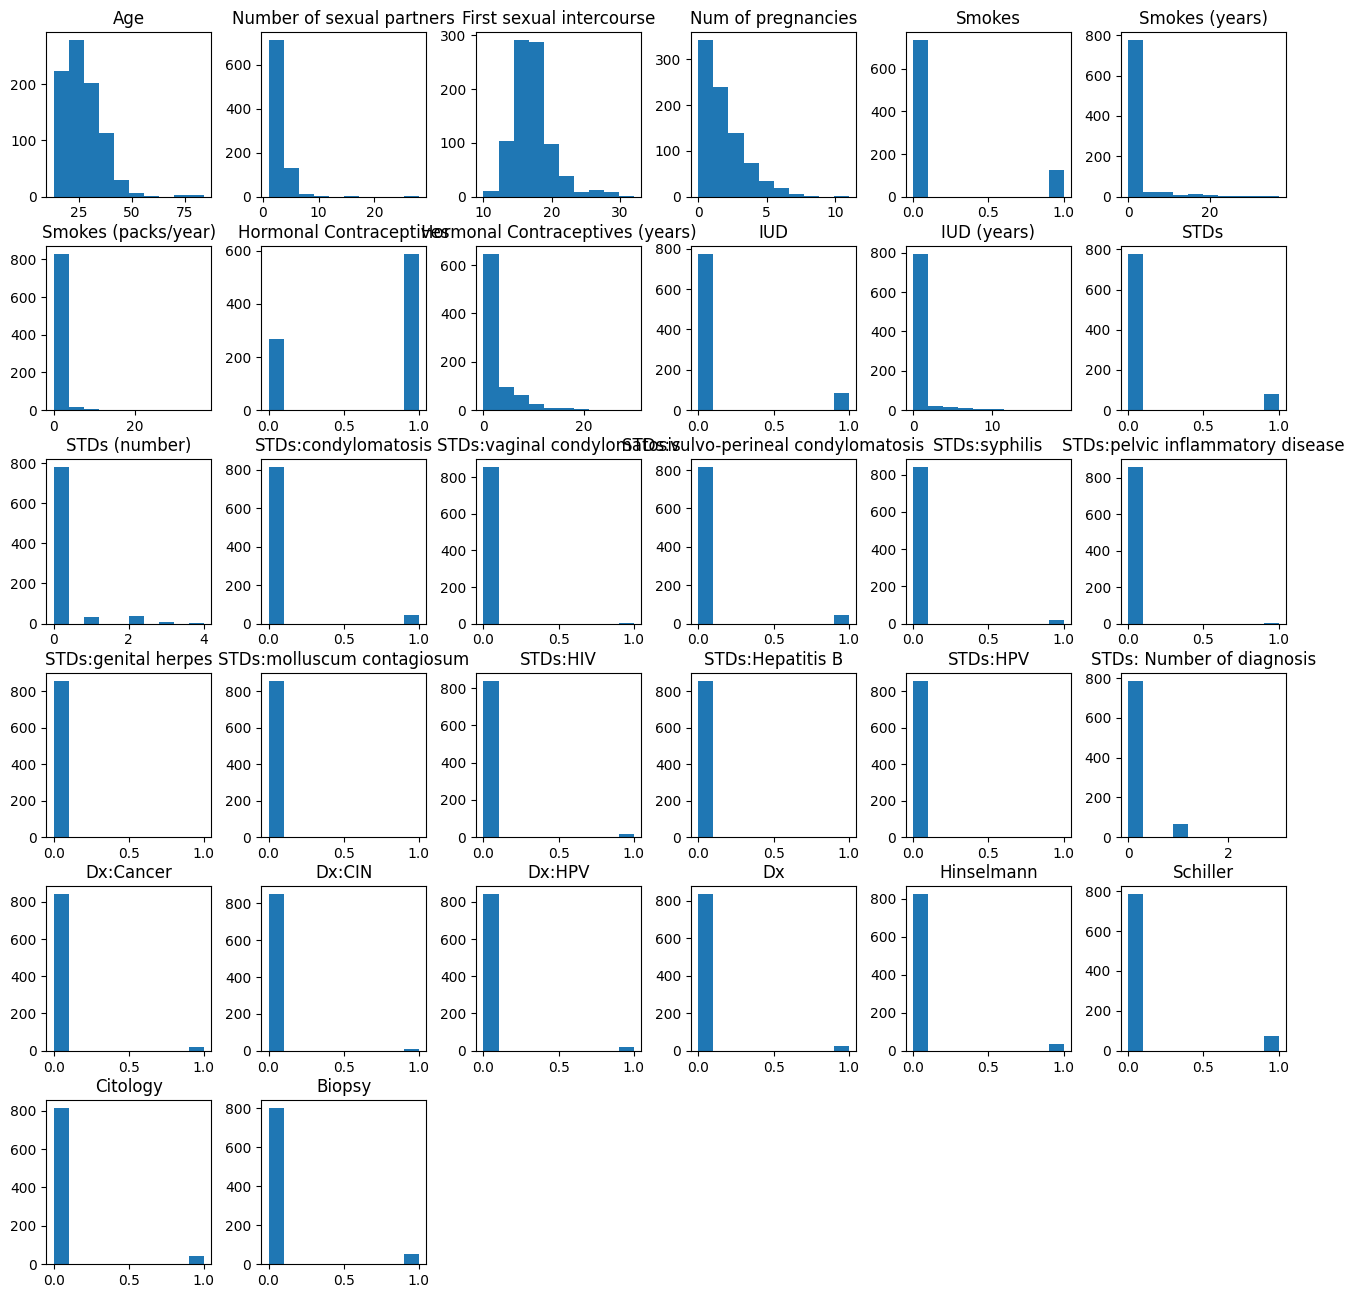

In [ ]:
cancer_data.hist(grid=False,figsize=(16,16))

plt.show()

#Let's look at the distribution of the parameters within themselves

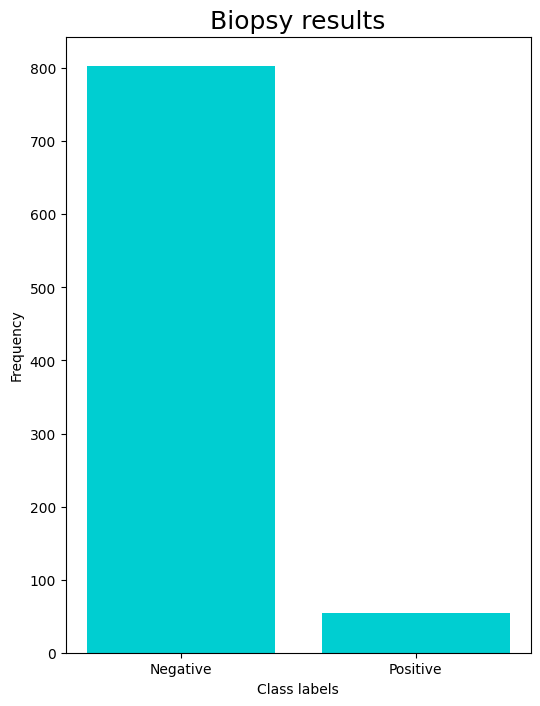

In [ ]:
cancer_data['Biopsy'].value_counts()
plt.figure(figsize = (6, 8))
plt.title('Biopsy results', fontsize = 18)
plt.bar(['Negative', 'Positive'], [803,55], color = 'darkturquoise')
plt.xlabel('Class labels')
plt.ylabel('Frequency')
plt.show()


In [ ]:
#I wanted to evaluate patients diagnosed with cancer separately.

# Separating groups with positive and negative biopsy results
biopsy_positive = cancer_data[cancer_data['Biopsy'] == 1]
biopsy_negative = cancer_data[cancer_data['Biopsy'] == 0]


biopsy_positive_summary = biopsy_positive.describe()
print(biopsy_positive_summary)

             Age  Number of sexual partners  First sexual intercourse  \
count  55.000000                  55.000000                 55.000000   
mean   28.636364                   2.509091                 17.072727   
std     8.884784                   1.274722                  2.595256   
min    16.000000                   1.000000                 11.000000   
25%    21.000000                   2.000000                 15.500000   
50%    28.000000                   2.000000                 17.000000   
75%    34.500000                   3.000000                 18.000000   
max    52.000000                   6.000000                 29.000000   

       Num of pregnancies     Smokes  Smokes (years)  Smokes (packs/year)  \
count           55.000000  55.000000       55.000000            55.000000   
mean             2.345455   0.181818        2.150309             0.652967   
std              1.336360   0.389249        6.221669             2.264003   
min              0.000000   0.0000

Age: The mean age of these patients is 28.58 years with a standard deviation of 8.74. The youngest patient is 16 years old, while the oldest patient is 50 years old.

Number of Sexual Partners: The mean number of sexual partners is 2.51 with a standard deviation of 1.27. While there are patients with at least 1 sexual partner, there are also patients with a maximum of 6 sexual partners.

Smoking Habit: 18.18% of these patients smoke. On average, patients who smoked smoked for 2.15 years and consumed an average of 0.65 packs of cigarettes per year.

Hormonal Contraceptive Use and IUD Use: Most of these patients (65.45%) used hormonal contraceptives. Additionally, 16.36% used IUD.

Cancer Diagnosis and Other Diagnoses: 10.91% of these patients were diagnosed with cancer. Additionally, 12.73% had HPV virus and 10.91% had other HPV-related diagnoses.

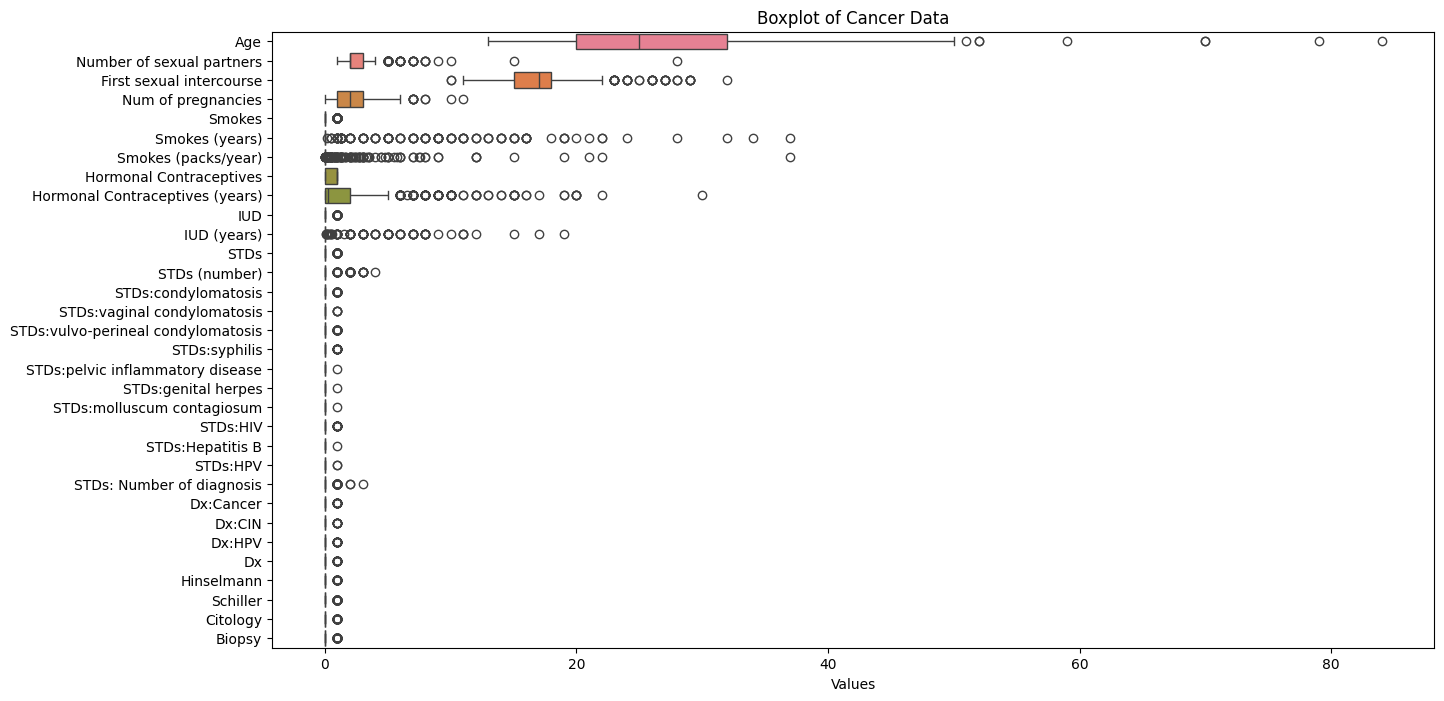

In [ ]:
#Let's check for outliers with #box plot
plt.figure(figsize=(15, 8))
sns.boxplot(data=cancer_data, orient="h")
plt.title("Boxplot of Cancer Data")
plt.xlabel("Values")
plt.show()

In [ ]:
def detect_outliers(df, columns, method='zscore', threshold=3):
    outliers = {}
    for column in columns:
        if column not in df.columns:
            print(f"Column '{column}' does not exist in the DataFrame.")
            continue
        if method == 'zscore':
            z_scores = (df[column] - df[column].mean()) / df[column].std()
            outliers[column] = df[(z_scores > threshold) | (z_scores < -threshold)][column]
        elif method == 'iqr':
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers

# Check column names
print("Available columns:", cancer_data.columns)

# Detect outliers
outliers = detect_outliers(cancer_data, numerical_columns, method='zscore', threshold=3)
print(outliers)

Available columns: Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')
{'Age': 652    59
667    79
668    84
676    70
682    70
Name: Age, dtype: int64, 'STDs: Number of diagnosis': 21     1
22     1
41     1
59     1
68     1
      ..
786    1
789    1
822    1
826    1
831    1
Name: STDs: Number of diagnosis, Length: 71, dtype: int64, 'Dx:Cancer': 3

In [ ]:
print(cancer_data['Age'].describe())

count    858.000000
mean      26.820513
std        8.497948
min       13.000000
25%       20.000000
50%       25.000000
75%       32.000000
max       84.000000
Name: Age, dtype: float64


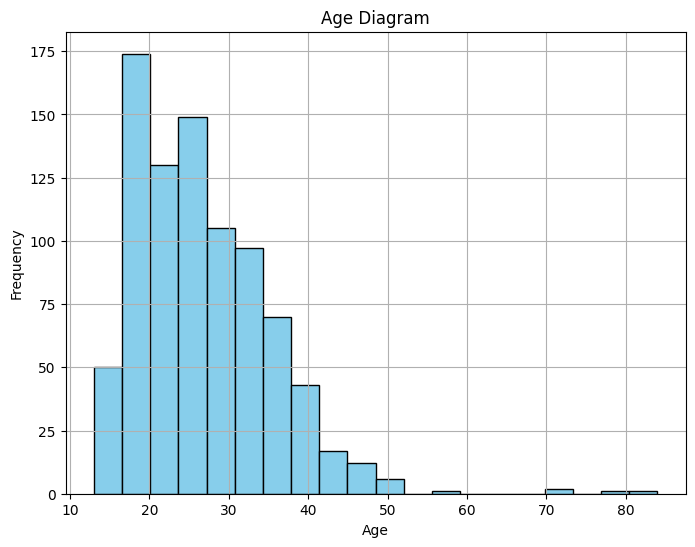

In [ ]:
# Plot the histogram of the Age variable and take a closer look
plt.figure(figsize=(8, 6))
plt.hist(cancer_data['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Diagram')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
def replace_outliers_iqr(df, column):

    # First quartile value (Q1) and third quartile value (Q3) are calculated
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Interquartile range (IQR) is calculated
    IQR = Q3 - Q1

    # Lower and upper limits are determined
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Outliers are pulled up to these limits
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    return df[column]

cancer_data['Age'] = replace_outliers_iqr(cancer_data, 'Age')


In [ ]:
print(cancer_data['Age'].describe())

count    858.000000
mean      26.684149
std        7.905613
min       13.000000
25%       20.000000
50%       25.000000
75%       32.000000
max       50.000000
Name: Age, dtype: float64


In [ ]:
# Replace outliers with breakpoint
cancer_data['Number of sexual partners'] = replace_outliers_iqr(cancer_data, 'Number of sexual partners')
print(cancer_data['Number of sexual partners'].describe())

count    858.000000
mean       2.382284
std        1.093959
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.500000
Name: Number of sexual partners, dtype: float64


In [ ]:
cancer_data['First sexual intercourse'] = replace_outliers_iqr(cancer_data, 'First sexual intercourse')
print(cancer_data['First sexual intercourse'].describe())

count    858.000000
mean      16.830420
std        2.323985
min       10.500000
25%       15.000000
50%       17.000000
75%       18.000000
max       22.500000
Name: First sexual intercourse, dtype: float64


**MODELS**

In [ ]:
def train_knn(X_train, X_test, y_train, y_test):
    # Create the KNN model (looking at 5 neighbors)
    knn_model = KNeighborsClassifier(n_neighbors=5)
    # Model training
    knn_model.fit(X_train, y_train)
    # Make predictions on the test set
    y_pred = knn_model.predict(X_test)
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print("KNN Accuracy:", accuracy)
    print("KNN Classification Report:")
    print(classification_report(y_test, y_pred))
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    # Visualize the confusion matrix
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title("KNN Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

In [ ]:
def train_ann(X_train, X_test, y_train, y_test):
    # Definition and training of Artificial Neural Network (ANN) model
    ann_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
    ann_model.fit(X_train, y_train)

    # Prediction on the test dataset
    y_pred = ann_model.predict(X_test)

    # Calculation and printing of accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("ANN Accuracy:", accuracy)

    # Printing the classification report
    print("ANN Classification Report:")
    print(classification_report(y_test, y_pred))

    # Creating and visualizing the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title("ANN Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

In [ ]:
def train_svm(X_train, X_test, y_train, y_test):
    # Initialize the SVM classifier with a linear kernel and a fixed random state for reproducibility
    svm_model = SVC(kernel='linear', random_state=42)

    # Fit the model using the training data
    svm_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = svm_model.predict(X_test)

    # Calculate and print the accuracy of the model on the test data
    accuracy = accuracy_score(y_test, y_pred)
    print("SVM Accuracy:", accuracy)

    # Print a detailed classification report
    print("SVM Classification Report:")
    print(classification_report(y_test, y_pred))

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix using a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title("SVM Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()


In [ ]:
def train_random_forest(X_train, X_test, y_train, y_test):
    # Initialize the Random Forest classifier with a fixed random state for reproducibility
    rf_model = RandomForestClassifier(random_state=42)

    # Fit the model using the training data
    rf_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = rf_model.predict(X_test)

    # Calculate and print the accuracy of the model on the test data
    accuracy = accuracy_score(y_test, y_pred)
    print("Random Forest Accuracy:", accuracy)

    # Print a detailed classification report
    print("Random Forest Classification Report:")
    print(classification_report(y_test, y_pred))

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix using a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title("Random Forest Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()


In [ ]:
def train_xgboost_with_gridsearch(X_train, X_test, y_train, y_test):
    # Define the parameter grid for hyperparameter tuning
    param_grid = {
        'learning_rate': [0.05, 0.1, 0.2],  # Learning rate values to try
        'max_depth': [3, 5, 7],             # Maximum depth of the trees
        'n_estimators': [50, 100, 200]      # Number of boosting rounds
    }

    # Initialize the XGBoost classifier
    xgb_model = xgb.XGBClassifier()

    # Set up the grid search with cross-validation
    grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

    # Fit the model to the training data using grid search
    grid_search.fit(X_train, y_train)

    # Print the best parameters and best score from the grid search
    print("Best Parameters:", grid_search.best_params_)
    print("Best Score:", grid_search.best_score_)

    # Retrieve the best model from grid search
    best_model = grid_search.best_estimator_

    # Predict the labels for the test data
    y_pred = best_model.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    print("XGBoost Accuracy:", accuracy)

    # Print the classification report
    print("XGBoost Classification Report:")
    print(classification_report(y_test, y_pred))

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title("XGBoost Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

In [ ]:
print(cancer_data.shape)

(858, 32)


In [ ]:
# Extract the 'Biopsy' column as the target variable
target_df = cancer_data['Biopsy']

# Drop the 'Biopsy' column to get the input features
input_df = cancer_data.drop(columns=['Biopsy'])

# Convert the input data to a NumPy array and cast it to 'float32' data type
X = np.array(input_df).astype('float32')

# Convert the target data to a NumPy array and cast it to 'float32' data type
y = np.array(target_df).astype('float32')

# Apply SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset
# SMOTE increases the samples of the minority class to achieve a balanced distribution
smote = SMOTE(random_state=42)  # Initialize SMOTE with a fixed random seed for reproducibility
X_resampled, y_resampled = smote.fit_resample(X, y)  # Generate a balanced dataset with SMOTE

# Split the dataset into training and testing sets
# Allocate 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
# 'random_state=42' ensures reproducibility of the random split
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1284, 31)
(1284,)
(322, 31)
(322,)


ANN Accuracy: 0.9751552795031055
ANN Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98       179
         1.0       0.95      0.99      0.97       143

    accuracy                           0.98       322
   macro avg       0.97      0.98      0.97       322
weighted avg       0.98      0.98      0.98       322



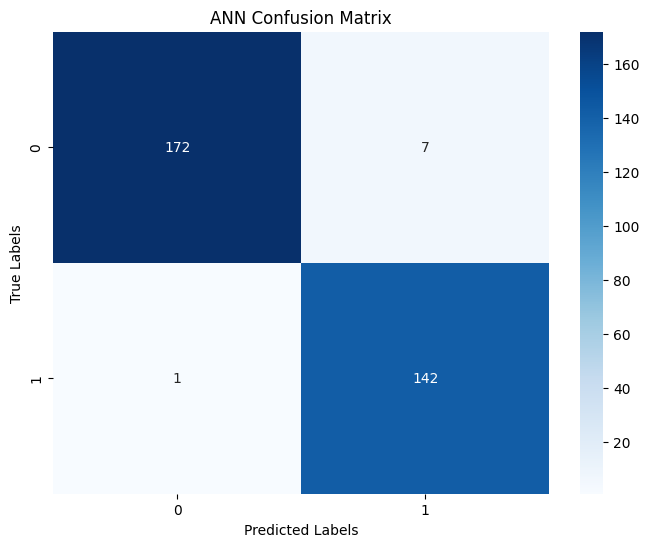

KNN Accuracy: 0.9130434782608695
KNN Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.85      0.92       179
         1.0       0.84      0.99      0.91       143

    accuracy                           0.91       322
   macro avg       0.92      0.92      0.91       322
weighted avg       0.93      0.91      0.91       322



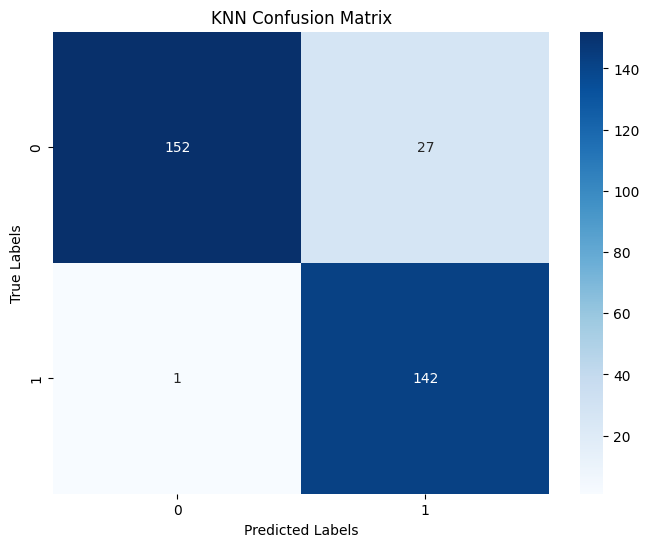

SVM Accuracy: 0.9596273291925466
SVM Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96       179
         1.0       0.94      0.97      0.96       143

    accuracy                           0.96       322
   macro avg       0.96      0.96      0.96       322
weighted avg       0.96      0.96      0.96       322



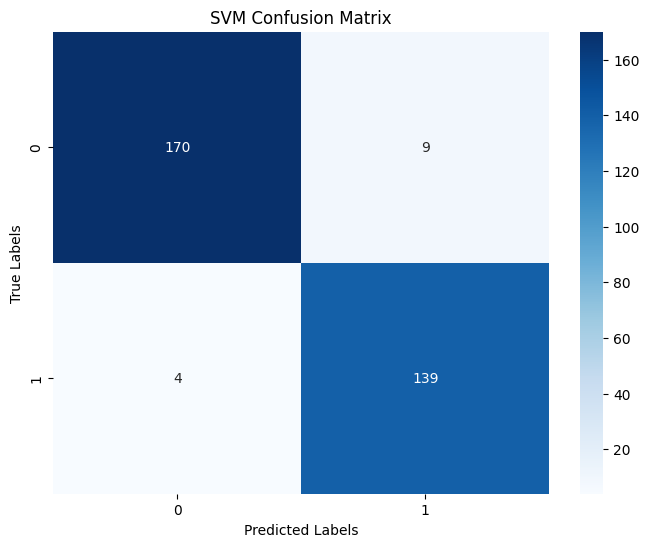

Random Forest Accuracy: 0.9751552795031055
Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98       179
         1.0       0.95      0.99      0.97       143

    accuracy                           0.98       322
   macro avg       0.97      0.98      0.97       322
weighted avg       0.98      0.98      0.98       322



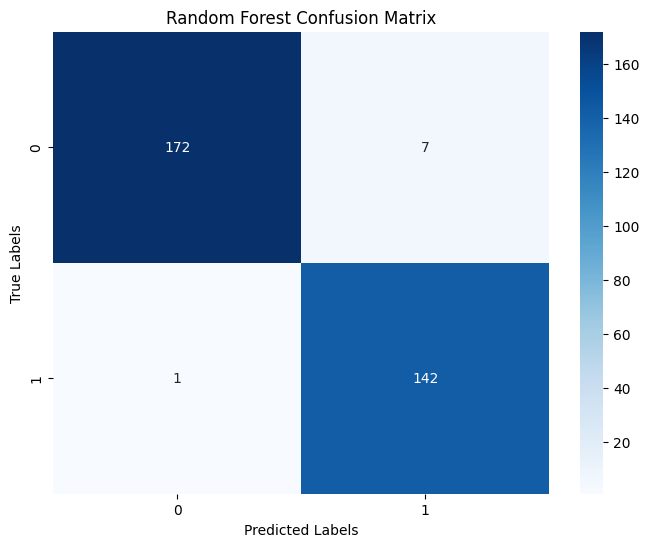

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}
Best Score: 0.9813084112149534
XGBoost Accuracy: 0.9813664596273292
XGBoost Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       179
         1.0       0.97      0.99      0.98       143

    accuracy                           0.98       322
   macro avg       0.98      0.98      0.98       322
weighted avg       0.98      0.98      0.98       322



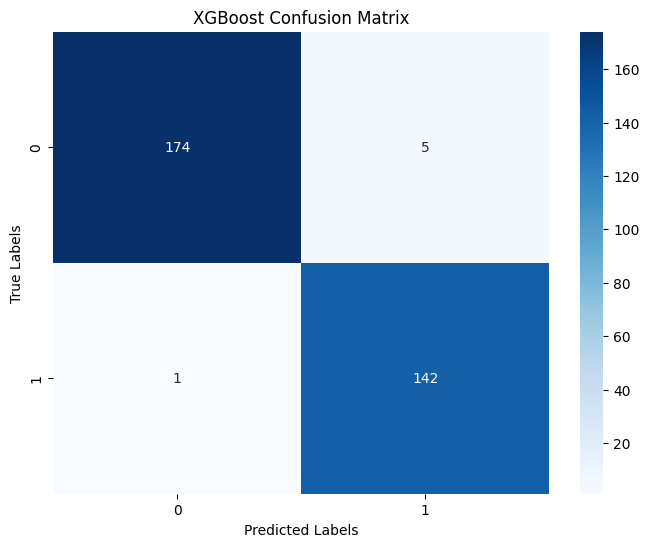

In [ ]:
# Train and evaluate models
train_ann(X_train, X_test, y_train, y_test)
train_knn(X_train, X_test, y_train, y_test)
train_svm(X_train, X_test, y_train, y_test)
train_random_forest(X_train, X_test, y_train, y_test)
train_xgboost_with_gridsearch(X_train, X_test, y_train, y_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def train_decision_tree(X_train, X_test, y_train, y_test):
    # Initialize the Decision Tree classifier with a fixed random state for reproducibility
    dt_model = DecisionTreeClassifier(random_state=42)

    # Fit the model using the training data
    dt_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = dt_model.predict(X_test)

    # Calculate and print the accuracy of the model on the test data
    accuracy = accuracy_score(y_test, y_pred)
    print("Decision Tree Accuracy:", accuracy)

    # Print a detailed classification report
    print("Decision Tree Classification Report:")
    print(classification_report(y_test, y_pred))

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix using a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title("Decision Tree Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

def train_adaboost(X_train, X_test, y_train, y_test):
    # Initialize the AdaBoost classifier with a fixed random state for reproducibility
    ab_model = AdaBoostClassifier(random_state=42)

    # Fit the model using the training data
    ab_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = ab_model.predict(X_test)

    # Calculate and print the accuracy of the model on the test data
    accuracy = accuracy_score(y_test, y_pred)
    print("AdaBoost Accuracy:", accuracy)

    # Print a detailed classification report
    print("AdaBoost Classification Report:")
    print(classification_report(y_test, y_pred))

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix using a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title("AdaBoost Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()


Decision Tree Accuracy: 0.9720496894409938
Decision Tree Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97       179
         1.0       0.97      0.97      0.97       143

    accuracy                           0.97       322
   macro avg       0.97      0.97      0.97       322
weighted avg       0.97      0.97      0.97       322



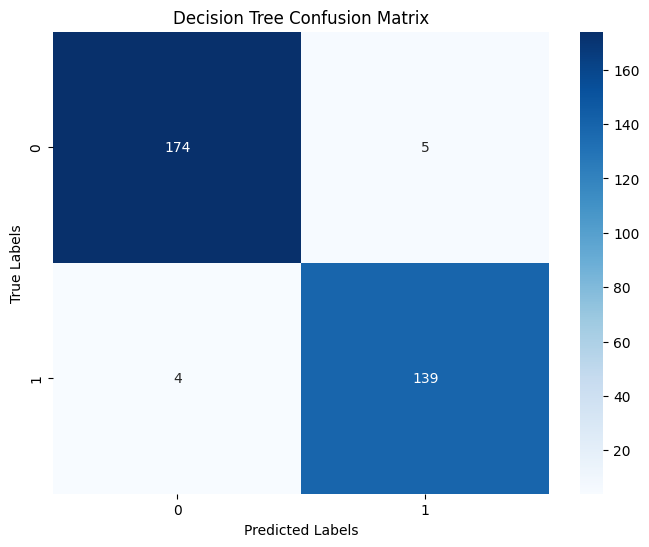

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.9782608695652174
AdaBoost Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       179
         1.0       0.97      0.99      0.98       143

    accuracy                           0.98       322
   macro avg       0.98      0.98      0.98       322
weighted avg       0.98      0.98      0.98       322



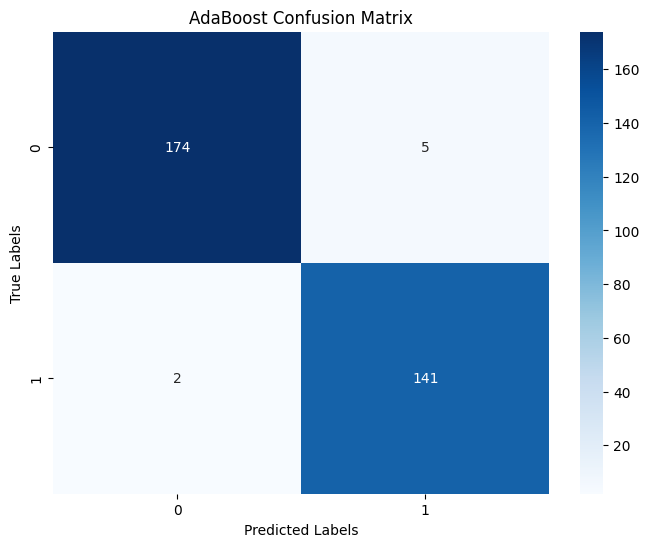

In [ ]:
train_decision_tree(X_train, X_test, y_train, y_test)
train_adaboost(X_train, X_test, y_train, y_test)